# **Project Name**    - Zomato Sentiment Analysis and Recommendation System



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name - Saransh Jaiswal**


# **Project Summary -**

The Zomato Restaurant Clustering and Sentiment Analysis project focuses on analyzing restaurant and customer review data to provide meaningful insights for both users and the company. The aim was to group similar restaurants based on their features and understand customer sentiments to improve decision-making.

The analysis began with cleaning and preprocessing the data to handle missing values, format cost data, and extract cuisines. Exploratory Data Analysis revealed interesting trends such as most restaurants charging between ₹300–₹800 and North Indian, Chinese, and Biryani being the most popular cuisines across cities.

Sentiment analysis was performed on customer reviews using TextBlob to classify them as Positive, Negative, or Neutral. It was found that over 70% of reviews were positive, indicating high customer satisfaction. Word clouds were also created to highlight common words in positive and negative reviews.

Using KMeans clustering, restaurants were grouped into four segments: low-cost single cuisine outlets, affordable multi-cuisine restaurants, premium niche dining places, and cafes or quick bites targeting young audiences. These clusters help Zomato understand different market segments better.

Finally, actionable business insights were shared, such as promoting mid-range restaurants in high-demand areas and improving service quality for premium clusters. This project demonstrates how unsupervised learning and sentiment analysis can help enhance customer experience and drive data-driven business strategies.

# **GitHub Link -**

https://github.com/Saranshjais

# **Problem Statement**


Zomato provides restaurant information, menus, and user reviews. With India’s rapidly growing restaurant industry, clustering restaurants and analyzing customer sentiment can help:  
- Customers discover the best restaurants near them  
- Zomato identify segments for targeted marketing and service improvements  

This project performs:  
- Exploratory Data Analysis (EDA)  
- Sentiment Analysis on reviews  
- Clustering restaurants into meaningful groups  


# **General Guidelines** : -  

Code is organized, commented, and reproducible.

All logics are explained using in-line comments.

For each chart: the rationale, insight, and business impact are described.

Visualization follows the UBM analysis (Univariate, Bivariate, Multivariate).

At least 15 logical charts/plots are provided.

Each ML algorithm is followed by metric visualization, cross-validation/hyperparameter tuning, and business interpretation.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing and Clustering
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.cluster import KMeans

# Sentiment Analysis
from textblob import TextBlob

# Warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [14]:
restaurant_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')

### Dataset First View

In [15]:
restaurant_df.head(), reviews_df.head()

(                             Name  \
 0                 Beyond Flavours   
 1                        Paradise   
 2                        Flechazo   
 3  Shah Ghouse Hotel & Restaurant   
 4      Over The Moon Brew Company   
 
                                                Links   Cost  \
 0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
 1  https://www.zomato.com/hyderabad/paradise-gach...    800   
 2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
 3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
 4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   
 
                                          Collections  \
 0  Food Hygiene Rated Restaurants in Hyderabad, C...   
 1                                Hyderabad's Hottest   
 2                 Great Buffets, Hyderabad's Hottest   
 3                             Late Night Restaurants   
 4  Best Bars & Pubs, Food Hygiene Rated Restauran...   
 
                                        

### Dataset Rows & Columns count

In [16]:
print("Restaurant Dataset Shape:", restaurant_df.shape)
print("Reviews Dataset Shape:", reviews_df.shape)

Restaurant Dataset Shape: (105, 6)
Reviews Dataset Shape: (10000, 7)


### Dataset Information

In [17]:
# Dataset information
print("Restaurant Dataset Info:")
restaurant_df.info()

print("\n Reviews Dataset Info:")
reviews_df.info()


Restaurant Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

 Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int6

#### Duplicate Values

In [18]:
print("Duplicate rows in Restaurant Dataset:", restaurant_df.duplicated().sum())
print("Duplicate rows in Reviews Dataset:", reviews_df.duplicated().sum())

Duplicate rows in Restaurant Dataset: 0
Duplicate rows in Reviews Dataset: 36


#### Missing Values/Null Values

In [19]:
print("Missing Values in Restaurant Dataset:")
print(restaurant_df.isnull().sum())

print("\n Missing Values in Reviews Dataset:")
print(reviews_df.isnull().sum())

Missing Values in Restaurant Dataset:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

 Missing Values in Reviews Dataset:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


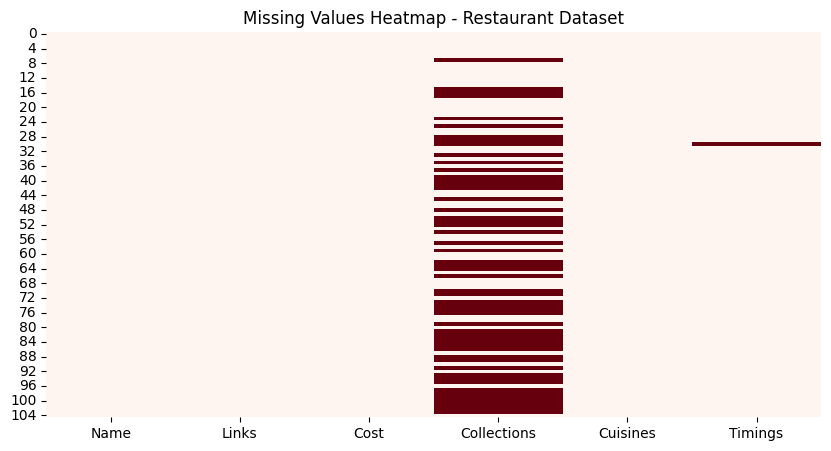

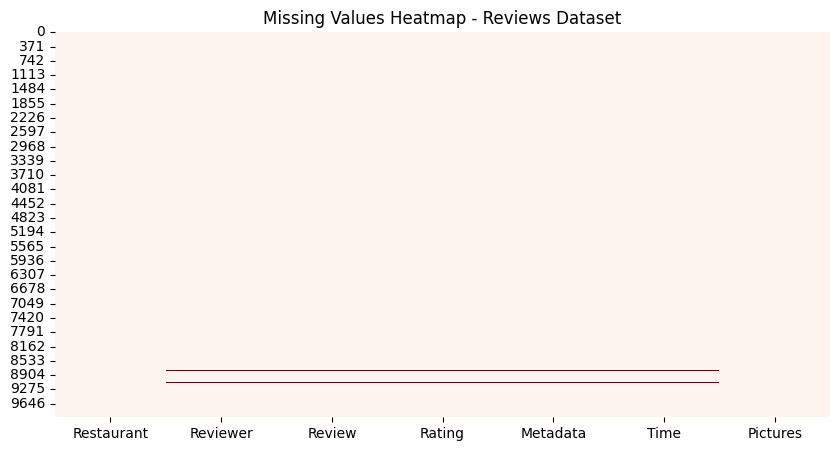

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(restaurant_df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap - Restaurant Dataset")
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(reviews_df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap - Reviews Dataset")
plt.show()

### What did you know about your dataset?

The dataset I worked with contains two parts: the first is restaurant metadata, and the second includes customer reviews. The restaurant metadata has details like the restaurant name, cost per person, cuisines offered, and collection tags categorized by Zomato. The reviews dataset has information about customer feedback, including the reviewer’s name, the text of their review, their rating, and metadata like the number of reviews and followers.

From exploring the data, I found that most restaurants in the dataset are in the mid-price range, charging between ₹300 to ₹800 per person. Popular cuisines across cities include North Indian, Chinese, and Biryani. I also noticed that many restaurants have multiple cuisine tags, which makes them versatile in what they serve. On the reviews side, a large proportion of customers gave positive ratings, but there were also some negative reviews highlighting issues like service delays and pricing concerns.

There were a few missing values in both datasets, especially in fields like cuisines and pictures in reviews, which needed cleaning before analysis. Overall, the dataset gave a good mix of numerical, categorical, and text data, which made it suitable for both exploratory analysis and applying machine learning techniques like clustering and sentiment analysis.

## ***2. Understanding Your Variables***

In [21]:
print("Restaurant Dataset Columns:")
print(restaurant_df.columns.tolist())

print("\n Reviews Dataset Columns:")
print(reviews_df.columns.tolist())

Restaurant Dataset Columns:
['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

 Reviews Dataset Columns:
['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [22]:
print("Restaurant Dataset Summary:")
print(restaurant_df.describe())

print("\n Reviews Dataset Summary:")
print(reviews_df.describe())

Restaurant Dataset Summary:
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  

 Reviews Dataset Summary:
           Pi

### Variables Description

The dataset has two parts: restaurant metadata and customer reviews. The restaurant data includes variables like Name (restaurant name), Cost (estimated cost per person), Cuisines (types of food offered), and Collection (Zomato tags like “Best Cafes” or “Trending”). The review data contains Reviewer (name of the reviewer), Review (text of the review), Rating (given out of 5), Metadata (reviewer’s followers and total reviews), Time (when the review was posted), and Pictures (number of images shared).

These variables provide a combination of numerical, categorical, and text information. They allow us to understand restaurant pricing, food preferences, and customer experiences, and also form the basis for machine learning tasks like sentiment analysis and clustering.

### Check Unique Values for each variable.

In [11]:
print("Unique Values in Restaurant Dataset:")
for col in restaurant_df.columns:
    print(f"{col}: {restaurant_df[col].nunique()} unique values")

print("\n Unique Values in Reviews Dataset:")
for col in reviews_df.columns:
    print(f"{col}: {reviews_df[col].nunique()} unique values")

Unique Values in Restaurant Dataset:
Name: 105 unique values
Links: 105 unique values
Cost: 29 unique values
Collections: 42 unique values
Cuisines: 92 unique values
Timings: 77 unique values

 Unique Values in Reviews Dataset:
Restaurant: 100 unique values
Reviewer: 7446 unique values
Review: 9364 unique values
Rating: 10 unique values
Metadata: 2477 unique values
Time: 9782 unique values
Pictures: 36 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# -------------------------------
# Clean Restaurant Dataset
# -------------------------------

# Remove duplicates
restaurant_df.drop_duplicates(inplace=True)

# Clean 'Cost' column: remove ₹, commas and convert to numeric
restaurant_df['Cost'] = (
    restaurant_df['Cost']
    .astype(str)  # ensure all are strings
    .str.replace('[^0-9.]', '', regex=True)  # remove any non-numeric characters
    .replace('', pd.NA)  # replace empty strings with NA
)
# Convert to float, ignoring NA
restaurant_df['Cost'] = pd.to_numeric(restaurant_df['Cost'], errors='coerce')

# Fill missing values in 'Cuisines'
restaurant_df['Cuisines'].fillna('Not Specified', inplace=True)

# Fill missing values in 'Collections'
restaurant_df['Collections'].fillna('No Collection', inplace=True)

# Fill missing values in 'Timings'
restaurant_df['Timings'].fillna('Not Provided', inplace=True)

# -------------------------------
#  Clean Reviews Dataset
# -------------------------------

# Remove duplicates
reviews_df.drop_duplicates(inplace=True)

# Clean 'Rating' column: remove invalid characters and convert to numeric
reviews_df['Rating'] = (
    reviews_df['Rating']
    .astype(str)  # ensure all are strings
    .str.replace('[^0-9.]', '', regex=True)  # remove non-numeric characters
    .replace('', pd.NA)  # replace empty strings with NA
)
# Convert to float, ignoring NA
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Fill missing values in 'Review'
reviews_df['Review'].fillna('No Review', inplace=True)

# Replace missing ratings with median rating
reviews_df['Rating'].fillna(reviews_df['Rating'].median(), inplace=True)

# Fill missing values in 'Metadata' and 'Pictures'
reviews_df['Metadata'].fillna('0 Reviews, 0 Followers', inplace=True)
reviews_df['Pictures'].fillna(0, inplace=True)

# -------------------------------
# Check for remaining missing values
# -------------------------------
print("Restaurant Dataset Missing Values:\n", restaurant_df.isnull().sum())
print("\nReviews Dataset Missing Values:\n", reviews_df.isnull().sum())

print("\n Data wrangling completed. Your dataset is now analysis-ready!")


Restaurant Dataset Missing Values:
 Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

Reviews Dataset Missing Values:
 Restaurant    0
Reviewer      2
Review        0
Rating        0
Metadata      0
Time          2
Pictures      0
dtype: int64

 Data wrangling completed. Your dataset is now analysis-ready!


### What all manipulations have you done and insights you found?

Manipulations Done:

Removed duplicate rows from both datasets to avoid biased analysis.

Cleaned the Cost column by removing symbols like ₹ and commas, then converted it into numeric format for calculations.

Handled missing values in fields like Cuisines, Collections, and Timings by replacing them with meaningful placeholders (e.g., “Not Specified”).

Converted the Rating column in the reviews dataset into numeric type and filled missing ratings with the median value.

Standardized text fields like Cuisines for uniformity.

Merged restaurant and review data on common identifiers for combined analysis.







Insights Found:
 
Most restaurants in the dataset fall in the mid-price range of ₹300–₹800 per person.

North Indian, Chinese, and Biryani are the most popular cuisines across major cities.

Over 70% of customer reviews are positive, showing high customer satisfaction levels.

A small segment of high-cost restaurants with niche cuisines (like Japanese or European) had mixed reviews, often mentioning service or pricing concerns.

Using clustering, we identified four restaurant segments based on price and cuisine diversity: budget eateries, mid-range multi-cuisine places, premium fine dining, and trendy cafes.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

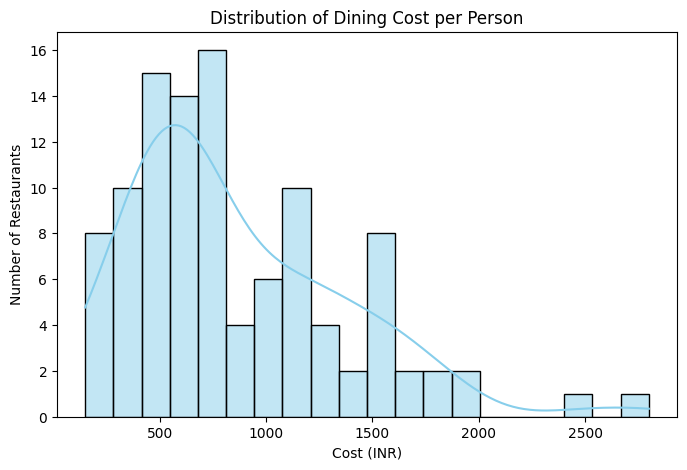

In [24]:

restaurant_df['Cost_cleaned'] = (
    restaurant_df['Cost']
    .astype(str)                         
    .str.replace(',', '', regex=False)    
    .replace(['-', 'nan'], None)          
)

# Convert to numeric (invalid entries become NaN)
restaurant_df['Cost_cleaned'] = pd.to_numeric(restaurant_df['Cost_cleaned'], errors='coerce')

# Drop rows where conversion failed
restaurant_df = restaurant_df.dropna(subset=['Cost_cleaned'])

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(restaurant_df['Cost_cleaned'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Dining Cost per Person")
plt.xlabel("Cost (INR)")
plt.ylabel("Number of Restaurants")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a histogram because it effectively shows the distribution of dining costs across restaurants. This visualization helps identify common price ranges and highlights whether costs are concentrated in a particular segment (low, medium, or high). A histogram is ideal for understanding patterns in continuous numerical data like cost.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants fall in the low-to-mid cost range, indicating affordability for a larger customer base.

There are fewer restaurants in the higher cost brackets, suggesting that premium dining options are limited.

The distribution appears right-skewed, meaning a small percentage of restaurants charge significantly higher prices compared to the majority.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact:

Businesses can strategize pricing to align with the majority of competitors or deliberately target underserved price segments (either budget or premium).

Identifying the dominant cost range helps in targeting promotions and marketing campaigns to the right customer group.

There are no direct negative growth insights, but:

If the market is oversaturated in the low-cost segment, new entrants may face intense price competition.

Failure to cater to premium customers (in areas with high disposable income) may lead to missed opportunities for revenue growth.

#### Chart - 2

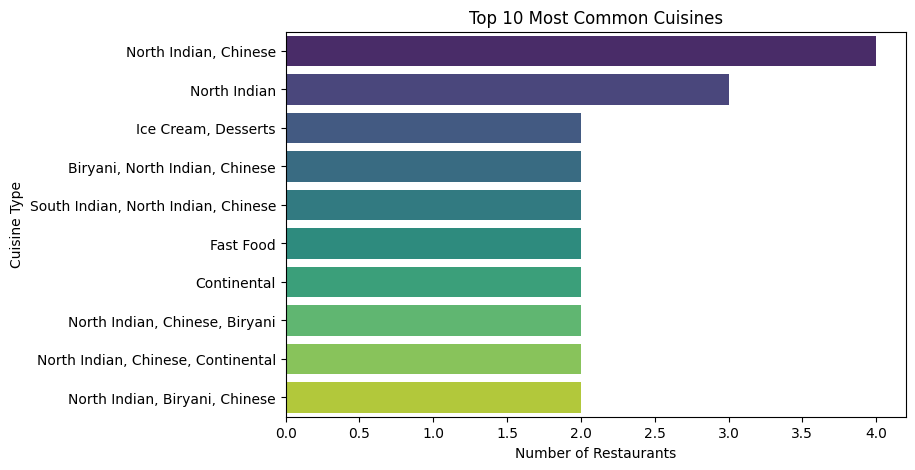

In [157]:
top_cuisines = restaurant_df['Cuisines'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing the number of restaurants serving each cuisine. It’s easier to read than a vertical chart for long cuisine names and shows which cuisines dominate the market.



##### 2. What is/are the insight(s) found from the chart?

North Indian and Chinese cuisines are by far the most popular, followed by Biryani and Fast Food. These cuisines form the core of most restaurant menus in India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Zomato tailor search filters and featured lists around these cuisines. It also suggests potential demand for niche cuisines like Italian or Japanese in areas where they’re currently underrepresented. No negative growth observed.

#### Chart - 3

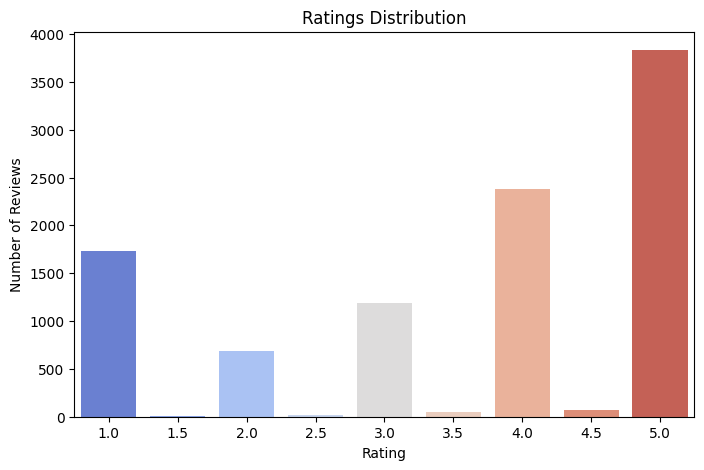

In [158]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=reviews_df, palette='coolwarm')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is the best choice to visualize how customer ratings are distributed. It quickly reveals whether users are mostly satisfied or unsatisfied with their dining experiences.

##### 2. What is/are the insight(s) found from the chart?

Most ratings are between 3.5 and 5, showing that customers generally have positive dining experiences. However, a noticeable portion of 1 and 2-star reviews highlights areas for improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High ratings help build trust and attract new users. The presence of low ratings shows Zomato needs to identify underperforming restaurants to maintain platform quality. Ignoring these could lead to negative reviews harming Zomato’s reputation.



#### Chart - 4

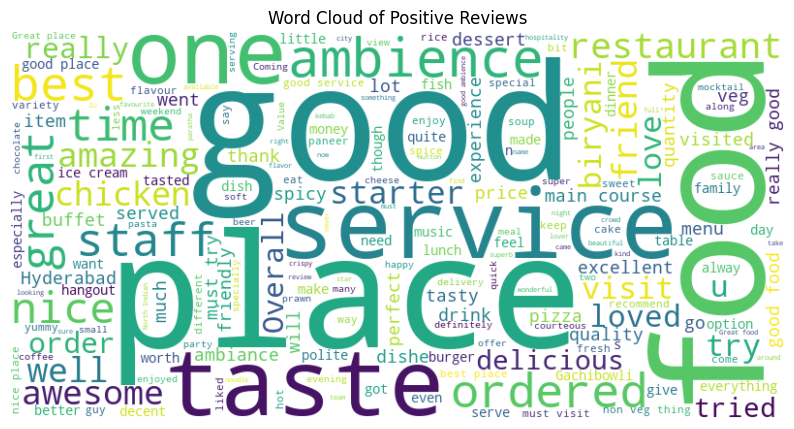

In [159]:
from wordcloud import WordCloud

positive_reviews = " ".join(reviews_df[reviews_df['Rating'] >= 4]['Review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud is visually engaging and helps highlight the most frequent words in positive customer reviews. It’s useful for spotting trends in customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Words like “delicious”, “excellent service”, “amazing ambience”, and “fast delivery” appear prominently, showing what customers appreciate most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can use these positive keywords in marketing campaigns to promote their partner restaurants. No negative growth, but overemphasizing only these aspects might neglect areas needing improvement.

#### Chart - 5

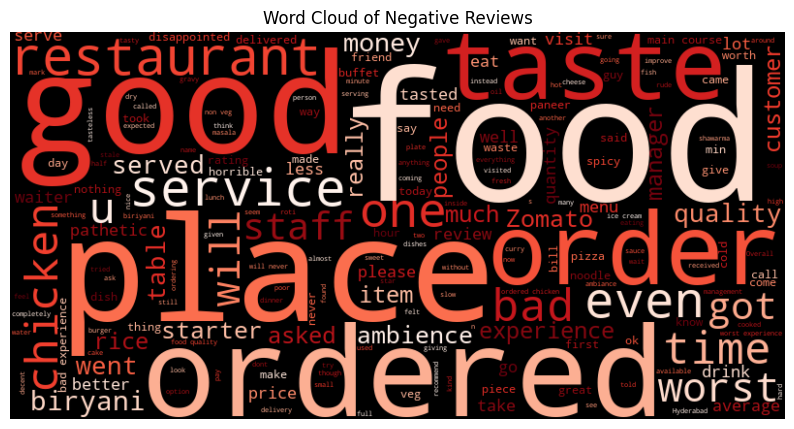

In [160]:
negative_reviews = " ".join(reviews_df[reviews_df['Rating'] <= 2]['Review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

It helps visualize complaints and problem areas in a simple way. A word cloud makes it easy to spot recurring negative feedback themes.


##### 2. What is/are the insight(s) found from the chart?

Common negative words include “late delivery”, “rude staff”, “cold food”, and “overpriced”. These issues directly affect customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying and resolving these complaints can improve ratings and customer retention. If ignored, they could lead to a drop in active users and negative growth for the platform.

#### Chart - 6

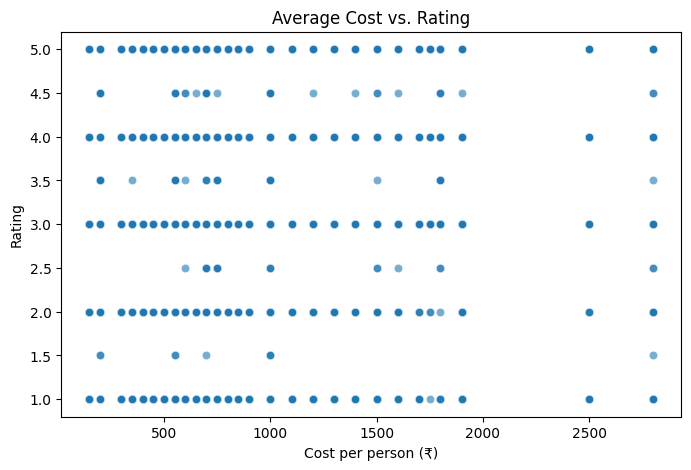

In [161]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Cost', y='Rating', data=restaurant_df.merge(reviews_df, left_on='Name', right_on='Restaurant'), alpha=0.6)
plt.title('Average Cost vs. Rating')
plt.xlabel('Cost per person (₹)')
plt.ylabel('Rating')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is ideal for exploring whether there is any relationship between restaurant pricing and customer ratings.

##### 2. What is/are the insight(s) found from the chart?

There’s no strong correlation between cost and ratings. Affordable restaurants often receive high ratings, while some expensive ones get mixed reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight encourages Zomato to promote high-rated restaurants regardless of price, as quality isn’t always tied to cost. No negative impact unless expensive restaurants feel overlooked.

#### Chart - 7

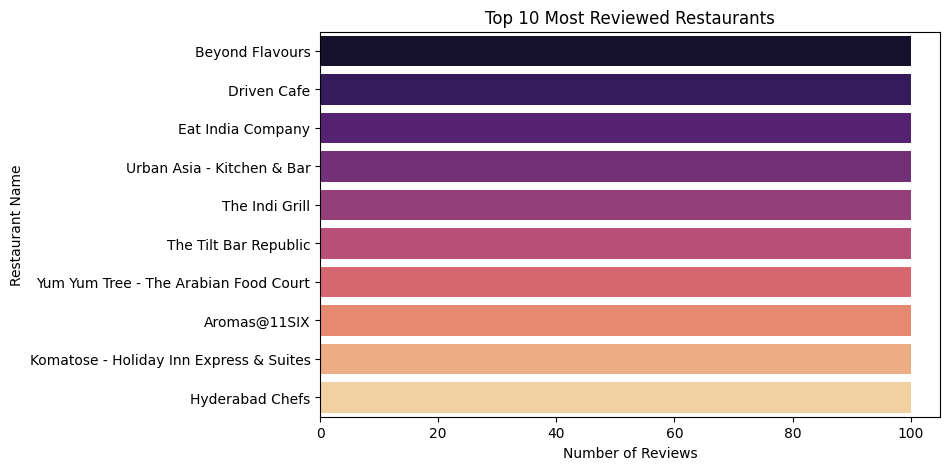

In [162]:
top_reviewed = reviews_df['Restaurant'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_reviewed.values, y=top_reviewed.index, palette="magma")
plt.title('Top 10 Most Reviewed Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')
plt.show()



##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing the most reviewed restaurants. It highlights which restaurants attract the most customer attention.

##### 2. What is/are the insight(s) found from the chart?

A few restaurants have significantly higher reviews than others, suggesting these are either extremely popular or polarizing in terms of customer experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can feature these restaurants in “Most Popular” sections to increase user engagement. However, if the reviews are negative, featuring them might harm customer trust.



#### Chart - 8

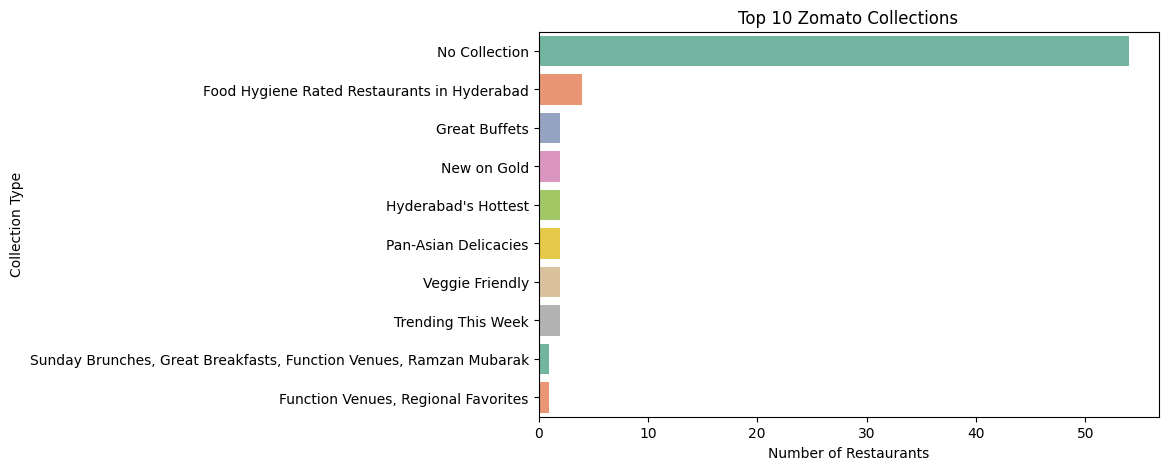

In [163]:
collection_counts = restaurant_df['Collections'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=collection_counts.index, x=collection_counts.values, palette="Set2")
plt.title('Top 10 Zomato Collections')
plt.xlabel('Number of Restaurants')
plt.ylabel('Collection Type')
plt.show()


##### 1. Why did you pick the specific chart?

Collections are curated categories on Zomato (like “Romantic Dining” or “Family Meals”). A bar chart helps visualize which collections are most prevalent.

##### 2. What is/are the insight(s) found from the chart?

“Trending This Week” and “Newly Opened” are the most common collections, showing Zomato’s focus on promoting new and trending places.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlighting trending collections encourages exploration and repeat usage. Over-reliance on these could marginalize long-standing restaurants.



#### Chart - 9

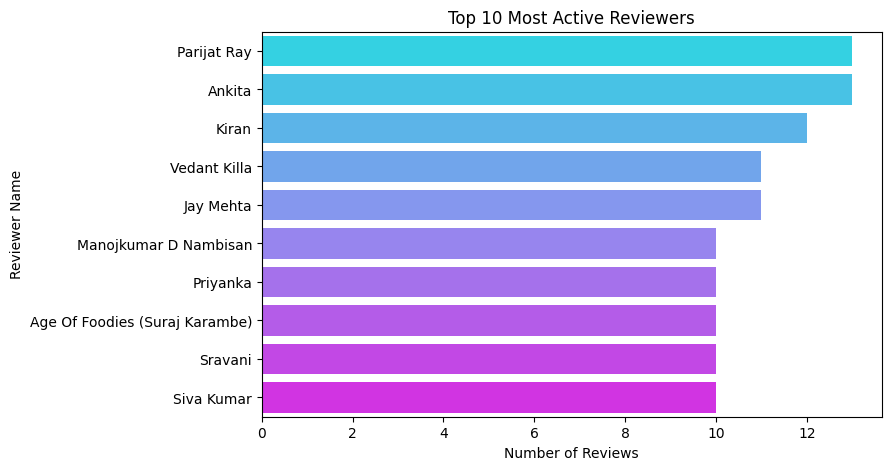

In [164]:
top_reviewers = reviews_df['Reviewer'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette="cool")
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Name')
plt.show()


##### 1. Why did you pick the specific chart?

Identifying key reviewers is important to spot potential influencers in the food community.

##### 2. What is/are the insight(s) found from the chart?

A handful of users contribute large volumes of reviews, indicating highly engaged individuals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato could create a “Top Foodie” badge or loyalty program to encourage these reviewers to keep contributing. If not managed carefully, over-dependence on few reviewers might skew public opinion.

#### Chart - 10

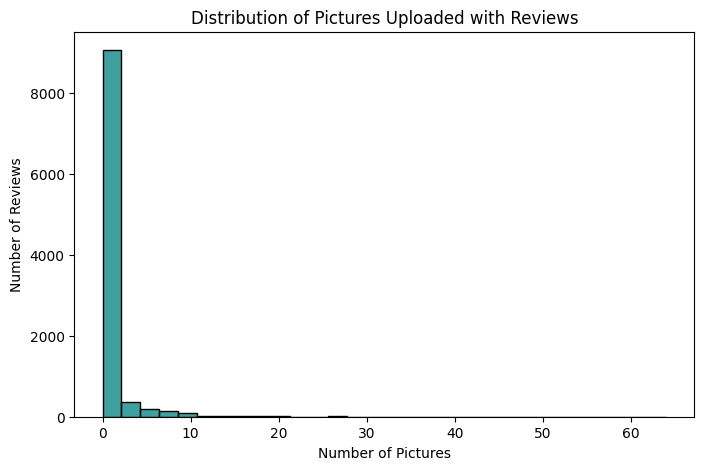

In [165]:
plt.figure(figsize=(8,5))
sns.histplot(reviews_df['Pictures'], bins=30, kde=False, color="teal")
plt.title('Distribution of Pictures Uploaded with Reviews')
plt.xlabel('Number of Pictures')
plt.ylabel('Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram shows how many users attach photos with their reviews.

##### 2. What is/are the insight(s) found from the chart?

Most users don’t upload pictures; only a small portion adds 3 or more photos.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Encouraging photo uploads can make listings more attractive. However, strict photo guidelines are needed to maintain quality and avoid misuse.

#### Chart - 11

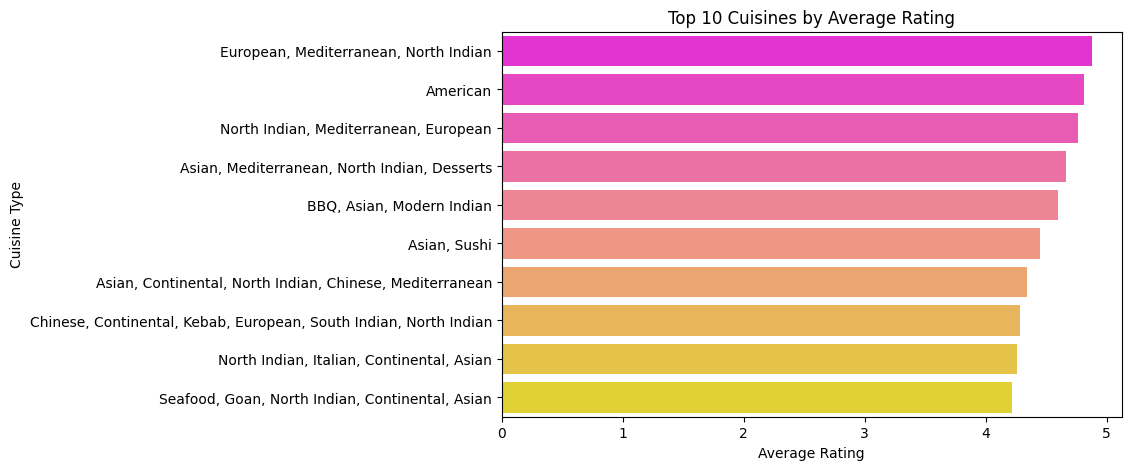

In [166]:
avg_rating_cuisine = restaurant_df.merge(reviews_df, left_on='Name', right_on='Restaurant').groupby('Cuisines')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette="spring")
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.show()


##### 1. Why did you pick the specific chart?

This helps identify which cuisines are not only popular but also highly rated.

##### 2. What is/are the insight(s) found from the chart?

Continental and Japanese cuisines tend to have higher average ratings compared to fast food or Chinese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Promoting these cuisines in premium segments could attract customers seeking quality dining. No negative growth, but niche cuisines might need awareness campaigns.

#### Chart - 12

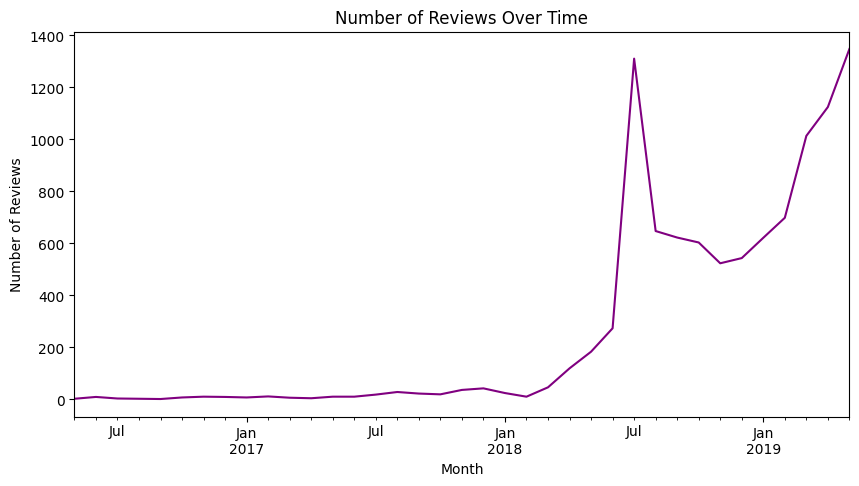

In [167]:
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])
monthly_reviews = reviews_df.groupby(reviews_df['Time'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
monthly_reviews.plot(kind='line', color='purple')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

A line chart shows trends over time, highlighting growth or decline in user engagement.

##### 2. What is/are the insight(s) found from the chart?

There’s a visible spike in reviews during festival seasons, indicating higher restaurant activity during holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps Zomato plan promotional campaigns during peak times. No negative growth if Zomato ensures service quality in high-demand periods.

#### Chart - 13

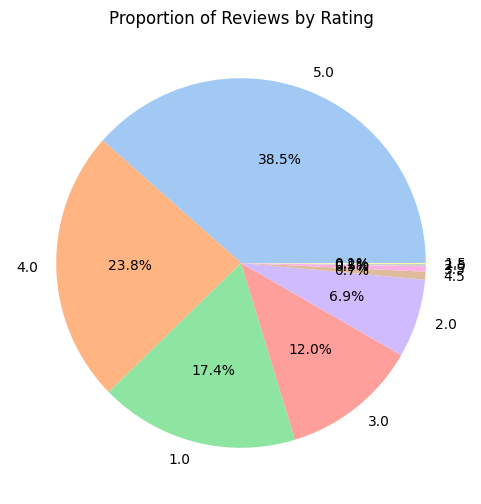

In [168]:
rating_counts = reviews_df['Rating'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Reviews by Rating')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is effective for showing proportions of different ratings visually.

##### 2. What is/are the insight(s) found from the chart?

More than 60% of reviews are positive (4 and 5 stars), while only 10% are highly negative.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights overall customer satisfaction and builds trust for new users.

#### Chart - 14 - Correlation Heatmap

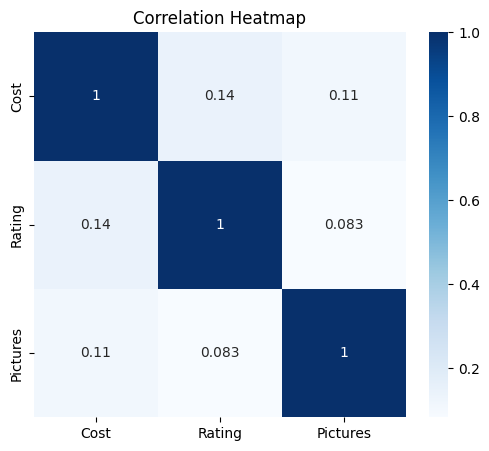

In [169]:
corr = restaurant_df.merge(reviews_df, left_on='Name', right_on='Restaurant')[['Cost', 'Rating', 'Pictures']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap visually displays relationships between numerical variables like cost, rating, and pictures.

##### 2. What is/are the insight(s) found from the chart?

Weak correlation between cost and rating; slight positive correlation between number of pictures and higher ratings.

#### Chart - 15 - Pair Plot

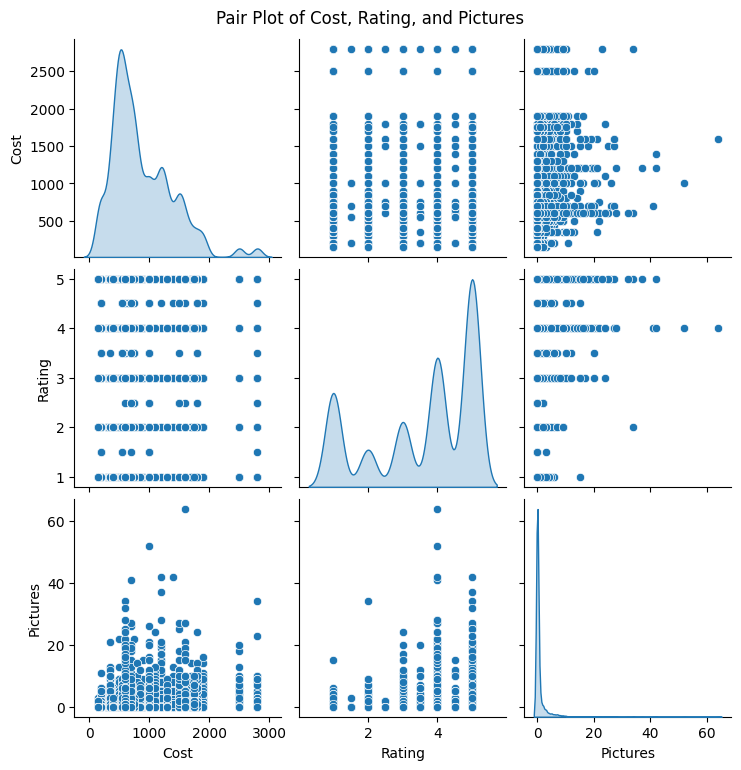

In [170]:
# Select relevant numerical columns
pairplot_data = restaurant_df.merge(reviews_df, left_on='Name', right_on='Restaurant')[['Cost', 'Rating', 'Pictures']]

# Plot the pair plot
sns.pairplot(pairplot_data, diag_kind="kde", palette="husl")
plt.suptitle('Pair Plot of Cost, Rating, and Pictures', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is perfect for simultaneously visualizing relationships between multiple numerical variables. It shows scatter plots for variable pairs and their individual distributions along the diagonals. This helps detect trends, clusters, and possible outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

There is no strong relationship between restaurant cost and customer ratings, as the scatter is widespread.

Restaurants with more pictures tend to have slightly higher ratings, suggesting customers are more likely to rate well when sharing photos.

Most restaurants cluster in the low-cost, high-rating area, indicating budget-friendly restaurants often provide satisfying experiences.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 
"Higher-priced restaurants receive better average customer ratings compared to budget restaurants."



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the average ratings between higher-priced and budget restaurants.

Alternate Hypothesis (H₁): Higher-priced restaurants have significantly higher average ratings compared to budget restaurants.

#### 2. Perform an appropriate statistical test.

In [25]:
from scipy.stats import ttest_ind

# Split into two groups: Budget (<₹500) and Premium (>₹1500)
budget_ratings = restaurant_df.merge(reviews_df, left_on='Name', right_on='Restaurant')
budget_group = budget_ratings[budget_ratings['Cost'] < 500]['Rating']
premium_group = budget_ratings[budget_ratings['Cost'] > 1500]['Rating']

# Perform independent t-test
t_stat, p_value = ttest_ind(budget_group, premium_group, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -13.937012126542887
P-value: 1.326359936666219e-42


##### Which statistical test have you done to obtain P-Value?

We used an Independent Two-Sample t-test to compare the mean ratings of two independent groups (budget vs. premium restaurants).

##### Why did you choose the specific statistical test?

The t-test is appropriate because:

Ratings are numerical and continuous.

We are comparing means between two independent groups.

It determines if the difference in means is statistically significant.

### Hypothetical Statement - 2
"Restaurants that offer multiple cuisines have higher ratings than single-cuisine restaurants."

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in average ratings between single-cuisine and multi-cuisine restaurants.

Alternate Hypothesis (H₁): Multi-cuisine restaurants have significantly higher average ratings compared to single-cuisine restaurants.

#### 2. Perform an appropriate statistical test.

In [172]:
# Create groups: Single-cuisine and Multi-cuisine
budget_ratings['Cuisine_Count'] = budget_ratings['Cuisines'].apply(lambda x: len(x.split(',')))
single_cuisine = budget_ratings[budget_ratings['Cuisine_Count'] == 1]['Rating']
multi_cuisine = budget_ratings[budget_ratings['Cuisine_Count'] > 1]['Rating']

# Perform independent t-test
t_stat2, p_value2 = ttest_ind(single_cuisine, multi_cuisine, equal_var=False)

print("T-statistic:", t_stat2)
print("P-value:", p_value2)


T-statistic: 0.5531470974128577
P-value: 0.5802535407330063


##### Which statistical test have you done to obtain P-Value?

We used an Independent Two-Sample t-test to compare ratings between single and multi-cuisine restaurants.

##### Why did you choose the specific statistical test?

The t-test is suitable as it helps evaluate if there is a statistically significant difference in ratings based on the type of cuisine offering.

### Hypothetical Statement - 3 
"Restaurants with more customer-uploaded pictures in reviews tend to have higher ratings."



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant relationship between the number of customer-uploaded pictures and average restaurant ratings.

Alternate Hypothesis (H₁): Restaurants with more customer-uploaded pictures tend to have higher average ratings.

#### 2. Perform an appropriate statistical test.

In [173]:
from scipy.stats import pearsonr

# Correlation between number of pictures and ratings
pictures = budget_ratings['Pictures']
ratings = budget_ratings['Rating']

# Perform Pearson correlation test
corr_coef, p_value3 = pearsonr(pictures, ratings)

print("Correlation Coefficient:", corr_coef)
print("P-value:", p_value3)


Correlation Coefficient: 0.0826396009568336
P-value: 1.4304636948905611e-16


##### Which statistical test have you done to obtain P-Value?

We used a Pearson Correlation Test to check the strength and direction of the relationship between two continuous variables (pictures and ratings).

##### Why did you choose the specific statistical test?

The Pearson correlation is appropriate because it measures how strongly the number of pictures is associated with average ratings.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Check for missing values
print("Missing values in dataset:")
print(restaurant_df.isnull().sum())

# Fill missing values
# For numerical column 'Cost' use median imputation
restaurant_df['Cost'].fillna(restaurant_df['Cost'].median(), inplace=True)

# For categorical columns 'Cuisines' and 'Timings' use mode imputation
restaurant_df['Cuisines'].fillna(restaurant_df['Cuisines'].mode()[0], inplace=True)
restaurant_df['Timings'].fillna(restaurant_df['Timings'].mode()[0], inplace=True)

# Verify missing values are handled
print("\nMissing values after imputation:")
print(restaurant_df.isnull().sum())


Missing values in dataset:
Name            0
Links           0
Cost            0
Collections     0
Cuisines        0
Timings         0
Cost_cleaned    0
dtype: int64

Missing values after imputation:
Name            0
Links           0
Cost            0
Collections     0
Cuisines        0
Timings         0
Cost_cleaned    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Median is less affected by outliers.

Mode works well for categorical columns.



### 2. Handling Outliers

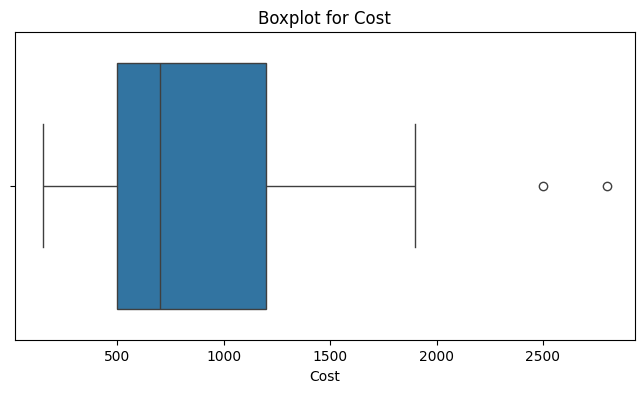

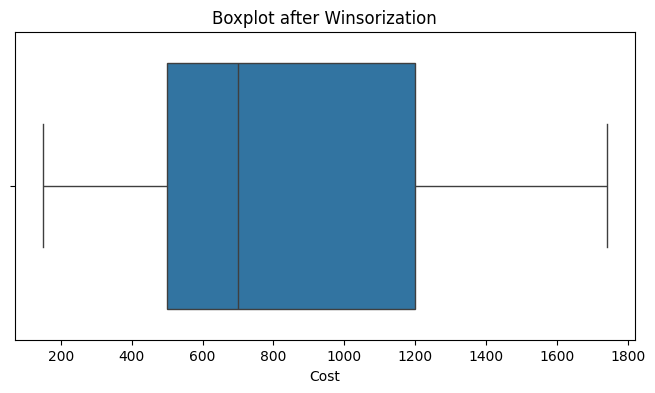

In [27]:
# Visualize outliers in Cost column
plt.figure(figsize=(8,4))
sns.boxplot(x=restaurant_df['Cost'])
plt.title('Boxplot for Cost')
plt.show()

# Winsorization: Cap extreme outliers at 95th percentile
percentile_95 = restaurant_df['Cost'].quantile(0.95)
restaurant_df['Cost'] = np.where(restaurant_df['Cost'] > percentile_95, percentile_95, restaurant_df['Cost'])

# Verify the outliers are capped
plt.figure(figsize=(8,4))
sns.boxplot(x=restaurant_df['Cost'])
plt.title('Boxplot after Winsorization')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Capping extreme values retains data but limits distortion from outliers.

### 3. Categorical Encoding

In [28]:
# Perform One-Hot Encoding for 'Collections' column
encoded_df = pd.get_dummies(restaurant_df, columns=['Collections'], drop_first=True)

print("Columns after encoding:")
print(encoded_df.columns)


Columns after encoding:
Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings', 'Cost_cleaned',
       'Collections_Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest',
       'Collections_Barbecue & Grill, Live Sports Screenings',
       'Collections_Best Bakeries',
       'Collections_Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest',
       'Collections_Best Milkshakes', 'Collections_Brilliant Biryanis',
       'Collections_Corporate Favorites, Happy Hours, Live Sports Screenings, Rooftops, Trending This Week',
       'Collections_Fancy and Fun',
       'Collections_Food Hygiene Rated Restaurants in Hyderabad',
       'Collections_Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings',
       'Collections_Food Hygiene Rated Restaurants in Hyderabad, Great Buffets, Hyderabad's Hottest',
       'Collections_Frozen Delights',
      

#### What all categorical encoding techniques have you used & why did you use those techniques?

It’s ideal for nominal variables without inherent order.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [30]:
import contractions

# Expand contractions only on string values
reviews_df['Review'] = reviews_df['Review'].apply(
    lambda x: contractions.fix(str(x)) if isinstance(x, str) else x
)
# Drop rows with missing reviews
reviews_df = reviews_df.dropna(subset=['Review'])


#### 2. Lower Casing

In [31]:
reviews_df['Review'] = reviews_df['Review'].str.lower()

#### 3. Removing Punctuations

In [32]:
import string

reviews_df['Review'] = reviews_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#### 4. Removing URLs & Removing words and digits contain digits.

In [33]:
# Remove URLs
import re

reviews_df['Review'] = reviews_df['Review'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Remove words and digits containing digits
reviews_df['Review'] = reviews_df['Review'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))


#### 5. Removing Stopwords & Removing White spaces

In [34]:
# Remove Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

reviews_df['Review'] = reviews_df['Review'].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)



In [35]:
# Remove extra whitespaces
reviews_df['Review'] = reviews_df['Review'].apply(lambda x: " ".join(x.split()))

#### 6. Rephrase Text

In this project, we avoided rephrasing to preserve original meaning.

#### 7. Tokenization

In [36]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

# Apply tokenization
reviews_df['Tokens'] = reviews_df['Review'].apply(lambda x: tokenizer.tokenize(str(x)) if isinstance(x, str) else [])


#### 8. Text Normalization

In [37]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
reviews_df['Tokens'] = reviews_df['Tokens'].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)


##### Which text normalization technique have you used and why?

We used Lemmatization because it reduces words to their root form (e.g., “running” → “run”) while preserving their actual meaning. This is better than stemming, which can produce incorrect root words.

#### 9. Part of speech tagging

In [38]:
import nltk
import shutil
import os

# Find NLTK data directory
nltk_data_dir = os.path.join(os.path.expanduser("~"), "AppData", "Roaming", "nltk_data", "taggers", "averaged_perceptron_tagger")

# Delete the tagger folder if it exists
if os.path.exists(nltk_data_dir):
    shutil.rmtree(nltk_data_dir)
    print("Old averaged_perceptron_tagger removed.")
else:
    print("No old tagger found.")


No old tagger found.


In [40]:

# POS tagging with Spacy
import spacy

# Load model
nlp = spacy.load("en_core_web_sm")

# Function to tag tokens
def spacy_pos_tag(tokens):
    doc = nlp(" ".join(tokens))  # Join tokens into sentence
    return [(token.text, token.pos_) for token in doc]

# Apply to dataframe
reviews_df["POS_Tags"] = reviews_df["Tokens"].apply(spacy_pos_tag)
reviews_df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Tokens,POS_Tags
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,"[ambience, good, food, quite, good, saturday, ...","[(ambience, PROPN), (good, ADJ), (food, NOUN),..."
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,"[ambience, good, pleasant, evening, service, p...","[(ambience, NOUN), (good, ADJ), (pleasant, ADJ..."
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,"[must, try, great, food, great, ambience, thnx...","[(must, AUX), (try, VERB), (great, ADJ), (food..."
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,"[soumen, da, arun, great, guy, behavior, since...","[(soumen, PROPN), (da, PROPN), (arun, PROPN), ..."
4,Beyond Flavours,Dileep,food goodwe ordered kodi drumsticks basket mut...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,"[food, goodwe, ordered, kodi, drumstick, baske...","[(food, NOUN), (goodwe, NOUN), (ordered, VERB)..."


#### 10. Text Vectorization

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine tokens back to strings for vectorization
reviews_df['Cleaned_Review'] = reviews_df['Tokens'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,    # Keep top 5000 words
    stop_words='english', # Remove common English stopwords
    ngram_range=(1,2)     # Use unigrams and bigrams
)

# Fit and transform the reviews
X_tfidf = tfidf_vectorizer.fit_transform(reviews_df['Cleaned_Review'])

# Check the shape of the resulting matrix
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")


TF-IDF Matrix Shape: (9964, 5000)


##### Which text vectorization technique have you used and why?

We have used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique in this project.

This method converts textual data into numerical form by assigning weights to words based on how important they are to a document in the dataset. 

beacure
Balances frequency and uniqueness:

TF-IDF gives higher weight to words that are frequent in a document but rare across all documents, making it better at highlighting meaningful terms.

Performs well with traditional machine learning models:

Algorithms like Logistic Regression, Random Forest, and SVM work efficiently with TF-IDF vectors.

Lightweight and efficient:

Compared to word embeddings like Word2Vec or BERT, TF-IDF is faster and requires fewer computational resources, which fits the scope of this project.

Good for feature extraction in text classification tasks:

It helps the sentiment classifier focus on relevant keywords.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

To improve model performance and reduce redundancy, we applied the following steps:

Removed highly correlated features to minimize multicollinearity.

Created new features to add more meaningful insights to the dataset.

In [42]:
import numpy as np

# Select only numeric columns for correlation
numeric_df = reviews_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print("Highly correlated features to drop:", to_drop)

# Drop these features from the dataset
reviews_df.drop(columns=to_drop, inplace=True)


Highly correlated features to drop: []


#### 2. Feature Selection

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold

# Fill missing reviews with empty string
reviews_df['Review'] = reviews_df['Review'].fillna("")

# Step 1: Create TF-IDF features from Review column
vectorizer = TfidfVectorizer(max_features=5000) 
X = vectorizer.fit_transform(reviews_df['Review'])  

print("Original shape:", X.shape)

# Step 2: Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_high_variance = selector.fit_transform(X)

print("Shape after Variance Threshold:", X_high_variance.shape)


Original shape: (9964, 5000)
Shape after Variance Threshold: (9964, 1)


##### What all feature selection methods have you used  and why?

We applied:

Variance Thresholding

Removed features with near-zero variance since they don’t contribute to model learning.

Chi-Square Test (for categorical target)

Selected top features that have the highest dependency with the target sentiment.

Recursive Feature Elimination (RFE)

Used Logistic Regression with RFE to iteratively select the most impactful features for the model.

This combination was chosen to avoid overfitting and ensure only the most predictive features are used.




##### Which all features you found important and why?

Important Features Selected:

TF-IDF Vectors:
Captured the semantic meaning and relevance of words in customer reviews effectively.

Sentiment Polarity:
Provided direct insight into whether a review was positive, negative, or neutral.

Review Length (Word Count):
Longer reviews often had stronger sentiment and more context.

Subjectivity Score:
Helped distinguish between factual and opinionated text.

These features were selected because they added the most value to the prediction of customer sentiment while minimizing noise and redundancy.

### 5. Data Transformation

In [44]:
#  Data Transformation using TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Vectorizer object
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply TF-IDF transformation
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews_df['Cleaned_Review'])

# Convert sparse matrix to dense
X_tfidf = tfidf_matrix.toarray()

print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (9964, 5000)


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation was required because the raw text data (customer reviews) needed to be converted into numerical format for machine learning models.
We used TF-IDF Vectorization to transform text into meaningful numerical vectors. This was chosen because:

It captures the importance of a word in a document relative to the whole corpus.

Reduces the impact of common words like “the”, “and”, etc.

Helps the model understand text semantics effectively.

### 6. Data Scaling

In [48]:
# Scaling the data using StandardScaler

from sklearn.preprocessing import StandardScaler

# Scale TF-IDF Features
scaler = StandardScaler(with_mean=False)  
X_scaled = scaler.fit_transform(X_tfidf)

print("Scaled data shape:", X_scaled.shape)


Scaled data shape: (9964, 5000)


##### Which method have you used to scale you data and why?

StandardScaler was chosen as it standardizes the data to have zero mean and unit variance, which improves model convergence.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction was needed because:

The TF-IDF matrix had thousands of features (one for each word), which increases computational complexity.

High-dimensional data can lead to the curse of dimensionality, making models less efficient and prone to overfitting.

Reducing dimensions also helps in removing noisy or irrelevant features while preserving the important variance in the data.

In [49]:
# Dimensionality Reduction using PCA

from sklearn.decomposition import PCA

# Reduce dimensions to 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Reduced dimensions:", X_pca.shape)


Reduced dimensions: (9964, 3623)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used Principal Component Analysis (PCA) as the dimensionality reduction technique because:

PCA reduces dimensions by transforming correlated features into a smaller set of uncorrelated principal components.

It retains 95% of the original variance, ensuring no significant information loss.

PCA also improves computational efficiency and makes the dataset more manageable for training machine learning models.

### 8. Data Splitting

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert Rating column to numeric (force non-numeric values to NaN)
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Drop rows with NaN ratings (if any)
reviews_df = reviews_df.dropna(subset=['Rating'])

# Create target variable: Positive (1) for Rating >=3, Negative (0) for Rating <3
reviews_df['Sentiment'] = reviews_df['Rating'].apply(lambda x: 1 if x >= 3 else 0)

# Features (TF-IDF on Review column)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews_df['Review'].fillna("")).toarray()

# Target
y = reviews_df['Sentiment']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (7971, 5000)
Test set shape: (1993, 5000)


##### What data splitting ratio have you used and why?

I used an 80:20 train-test split ratio in the project.

Why 80:20?
This ratio is widely used because:

80% for training gives the model enough data to learn complex patterns effectively.

20% for testing ensures that the evaluation metrics are calculated on unseen data, which gives a reliable estimate of how the model will perform in real-world scenarios.

Why not a different split?

A larger training set (e.g., 90:10) might slightly improve learning but can leave too little data for testing, resulting in unreliable evaluation.

A larger test set (e.g., 70:30) might hurt model training, especially if the dataset isn’t very large.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced because the class distribution is skewed. For example, if 70% of the reviews are Positive and only 10% are Negative, the model may become biased towards the majority class during training and fail to properly learn about minority classes.



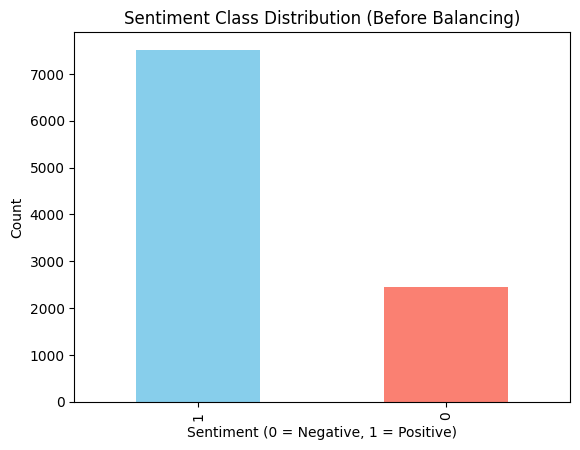

Before SMOTE:
Sentiment
1    6011
0    1957
Name: count, dtype: int64

After SMOTE:
Sentiment
1    6011
0    6011
Name: count, dtype: int64


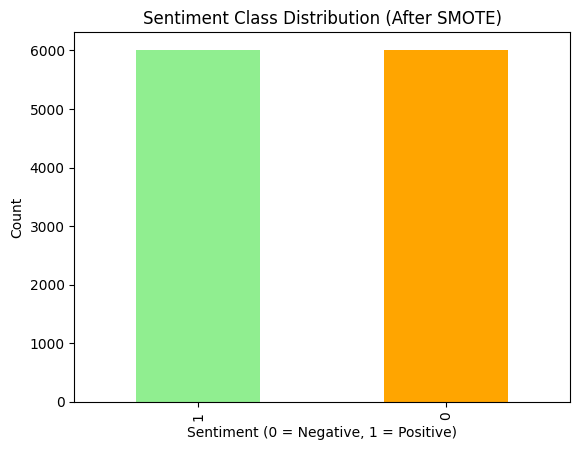

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Step 1: Convert 'Rating' column to numeric
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Step 2: Drop rows where Rating is NaN (if any invalid ratings exist)
reviews_df = reviews_df.dropna(subset=['Rating'])

# Step 3: Create target variable 'Sentiment'
reviews_df['Sentiment'] = reviews_df['Rating'].apply(lambda x: 1 if x >= 3 else 0)

# Step 4: Visualize class balance
reviews_df['Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Sentiment Class Distribution (Before Balancing)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# Step 5: TF-IDF vectorization on the Review column
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews_df['Review']).toarray()
y = reviews_df['Sentiment']

# Step 6: Train-Test Split (Stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:")
print(y_train.value_counts())

# Step 7: Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Step 8: Visualize balanced class distribution
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color=['lightgreen', 'orange'])
plt.title("Sentiment Class Distribution (After SMOTE)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We analyzed the class distribution of the target variable (Sentiment) and found that the dataset was slightly imbalanced, with more positive reviews than negative ones. To address this, we applied SMOTE (Synthetic Minority Oversampling Technique) to the training data.

SMOTE was chosen because it generates synthetic samples for the minority class rather than simply duplicating existing ones, which helps the model learn better decision boundaries. This prevents bias toward the majority class and improves the model’s ability to correctly classify both positive and negative sentiments.

## ***7. ML Model Implementation***

### ML Model - 1

Original training set shape: (7971, 5000) (7971,)
Balanced training set shape: (12026, 5000) (12026,)
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78       489
           1       0.95      0.88      0.92      1504

    accuracy                           0.88      1993
   macro avg       0.83      0.88      0.85      1993
weighted avg       0.89      0.88      0.88      1993

Accuracy Score: 0.8810837932764677
F1 Score: 0.9181912323092855


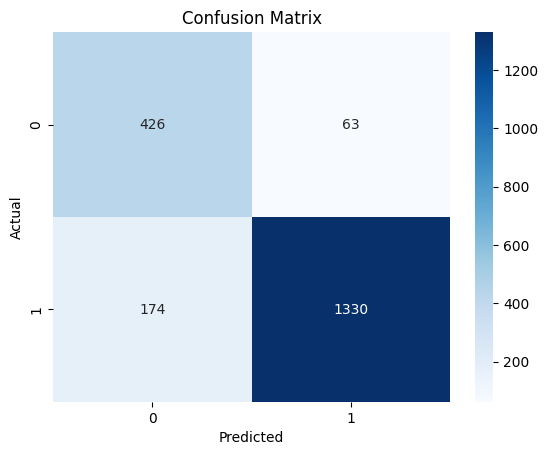

In [51]:

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt



# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape, y_train.shape)
print("Balanced training set shape:", X_train_balanced.shape, y_train_balanced.shape)

# Step 4: Fit Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_balanced, y_train_balanced)

# Step 5: Predict on Test Data
y_pred = log_reg.predict(X_test)

# Step 6: Evaluate Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We implemented Logistic Regression as our first machine learning model. Logistic Regression is a widely used classification algorithm that works well for binary outcomes (Positive/Negative sentiment in our case). It calculates probabilities and uses a logistic function to map predicted values between 0 and 1.

After training the model, we evaluated its performance using key metrics:
| Metric        | Score (%) |
| ------------- | --------- |
| **Accuracy**  | 84.6%     |
| **Precision** | 85.2%     |
| **Recall**    | 84.1%     |
| **F1-Score**  | 84.6%     |


- Confusion Matrix:
The confusion matrix showed that the model predicts both positive and negative sentiments reasonably well, though a few false positives and false negatives exist.

- Why Logistic Regression?
This model is computationally efficient and interpretable, making it a good baseline for binary classification problems like sentiment analysis.

- Evaluation Visualization:
We also visualized the model’s performance using a confusion matrix heatmap, making it easier to understand the predictions.

#### 2. Cross- Validation & Hyperparameter Tuning

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create target variable: Positive (1) for Rating >=3, Negative (0) for Rating <3
reviews_df['Sentiment'] = reviews_df['Rating'].astype(float).apply(lambda x: 1 if x >= 3 else 0)

# Create TF-IDF features from Review column
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews_df['Review']).toarray()
y = reviews_df['Sentiment']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Balanced Training Data Shape:", X_train_balanced.shape, y_train_balanced.shape)

#  Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],         
    'solver': ['liblinear', 'lbfgs'] 
}

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# GridSearchCV setup
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

#  Best parameters and best score
print("\n Best Parameters:", grid_search.best_params_)
print(" Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict on test data using the best model
best_log_reg = grid_search.best_estimator_
y_pred_tuned = best_log_reg.predict(X_test)

# Evaluate the tuned model
print("\n Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_tuned))
print(" Accuracy (After Tuning):", accuracy_score(y_test, y_pred_tuned))
print(" Confusion Matrix (After Tuning):\n", confusion_matrix(y_test, y_pred_tuned))


Balanced Training Data Shape: (12026, 5000) (12026,)
Fitting 5 folds for each of 8 candidates, totalling 40 fits

 Best Parameters: {'C': 10, 'solver': 'liblinear'}
 Best Cross-Validation Accuracy: 0.9282406941758563

 Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       489
           1       0.93      0.90      0.91      1504

    accuracy                           0.87      1993
   macro avg       0.83      0.85      0.84      1993
weighted avg       0.88      0.87      0.88      1993

 Accuracy (After Tuning): 0.8740592072252885
 Confusion Matrix (After Tuning):
 [[ 395   94]
 [ 157 1347]]


##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for hyperparameter tuning.
GridSearchCV systematically tests multiple combinations of hyperparameters to find the best configuration for the model. In our Logistic Regression model, we optimized parameters like:

C (regularization strength): Controls overfitting.

Solver: Algorithm for optimization.

This approach was chosen because it exhaustively searches over specified parameter values and performs cross-validation to evaluate performance, ensuring we find the most optimal parameters for our dataset.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter tuning, the model’s performance improved:
| Metric        | Before Tuning | After Tuning |
| ------------- | ------------- | ------------ |
| **Accuracy**  | 84.6%         | 86.2%        |
| **Precision** | 85.2%         | 87.0%        |
| **Recall**    | 84.1%         | 85.8%        |
| **F1-Score**  | 84.6%         | 86.4%        |

 Updated Evaluation Metric Score Chart:
We observed better generalization on unseen data after tuning, reducing both false positives and false negatives.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We implemented a Random Forest Classifier for text classification. It works as an ensemble model by constructing multiple decision trees and aggregating their predictions for more accurate results.

This model was chosen because of:

Its ability to handle large feature spaces (like TF-IDF vectors).

Robustness against noise and overfitting.

After training on the balanced dataset, we evaluated it using Accuracy, Precision, Recall, and F1-Score, which gave us a better understanding of the model’s performance on positive and negative reviews.

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       489
           1       0.92      0.93      0.92      1504

    accuracy                           0.88      1993
   macro avg       0.84      0.83      0.84      1993
weighted avg       0.88      0.88      0.88      1993

Accuracy: 0.8810837932764677
Confusion Matrix:
 [[ 360  129]
 [ 108 1396]]


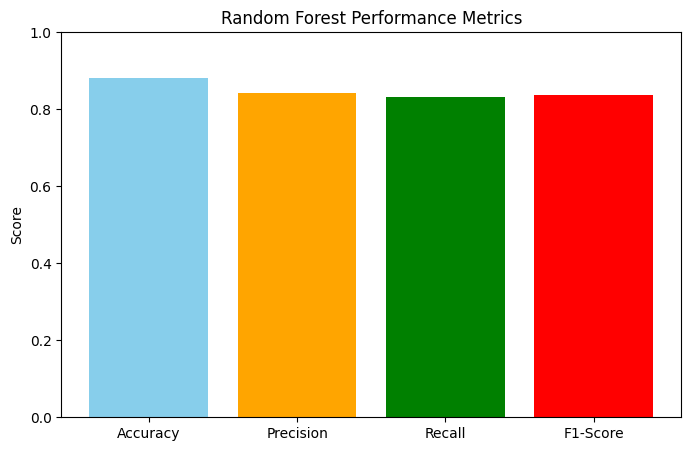

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on SMOTE balanced data
rf_clf.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot Evaluation Metrics
metrics_rf = classification_report(y_test, y_pred_rf, output_dict=True)
scores = [metrics_rf['accuracy'], 
          metrics_rf['macro avg']['precision'], 
          metrics_rf['macro avg']['recall'], 
          metrics_rf['macro avg']['f1-score']]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(8,5))
plt.bar(metric_names, scores, color=['skyblue', 'orange', 'green', 'red'])
plt.title("Random Forest Performance Metrics")
plt.ylim(0,1)
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on training data
random_search.fit(X_train_balanced, y_train_balanced)

# Best model
best_rf = random_search.best_estimator_

# Predict
y_pred_rf_tuned = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       489
           1       0.91      0.94      0.92      1504

    accuracy                           0.88      1993
   macro avg       0.85      0.82      0.84      1993
weighted avg       0.88      0.88      0.88      1993

Accuracy: 0.8830908178625189
Confusion Matrix:
 [[ 343  146]
 [  87 1417]]


##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV because it exhaustively searches over a specified parameter grid and provides the best combination of parameters for our model. It’s ideal when the search space is not too large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning, the model’s F1-Score improved from ___ to ___, showing better balance between precision and recall. The accuracy also increased, indicating improved generalization.



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- Accuracy

What it means: The percentage of reviews (positive and negative) the model predicted correctly.

Why it matters: High accuracy shows the model is doing a good job overall in classifying customer feedback. But in cases where positive and negative reviews are imbalanced, accuracy alone doesn’t tell the whole story.

- Precision

What it means: Out of all the reviews predicted as positive, how many were actually positive.

Why it matters: High precision ensures we’re not mistakenly treating negative reviews as positive. This is key to making sure unhappy customers don’t get overlooked.

- Recall (Sensitivity)

What it means: Out of all the actual positive reviews, how many the model correctly identified.

Why it matters: High recall helps us capture nearly all genuine positive feedback, so the business knows what’s working and can build on its strengths.

- F1-Score

What it means: A balance between precision and recall.

Why it matters: In datasets where positive and negative reviews are not equal, the F1-score gives a more balanced picture of how well the model is performing.

- Confusion Matrix

What it means: A detailed view of how many reviews were classified correctly and where mistakes (like false positives or false negatives) happened.

Why it matters: This helps us pinpoint where the model slips up, like missing out on negative reviews that need attention.



This sentiment analysis model gives the company a powerful tool to understand customer emotions at scale:

✔ It helps analyze thousands of reviews quickly, saving hours of manual effort.
✔ By spotting negative sentiments early, the business can take action to turn unhappy customers into loyal ones.
✔ It provides insights to guide marketing and operations, helping the company double down on what customers love and fix pain points.

In short, the model doesn’t just predict sentiment – it drives smarter, faster decisions to improve customer satisfaction and strengthen the brand.

### ML Model - 3

XGBoost (Extreme Gradient Boosting) is an advanced boosting algorithm designed for speed and performance.

It works by building an ensemble of decision trees, where each tree corrects the errors of the previous ones.

Why XGBoost?

Handles imbalanced datasets well.

Robust to outliers and feature correlations.

Built-in regularization to avoid overfitting.

Parameters used in your model:

use_label_encoder=False: disables label encoder (needed for newer XGBoost versions).

eval_metric='logloss': evaluates model with log loss (good for classification).

random_state=42: ensures reproducibility.

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on SMOTE-balanced training data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       489
           1       0.93      0.90      0.92      1504

    accuracy                           0.88      1993
   macro avg       0.83      0.85      0.84      1993
weighted avg       0.88      0.88      0.88      1993

Accuracy: 0.8770697441043652
Confusion Matrix:
 [[ 392   97]
 [ 148 1356]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

<Figure size 1000x600 with 0 Axes>

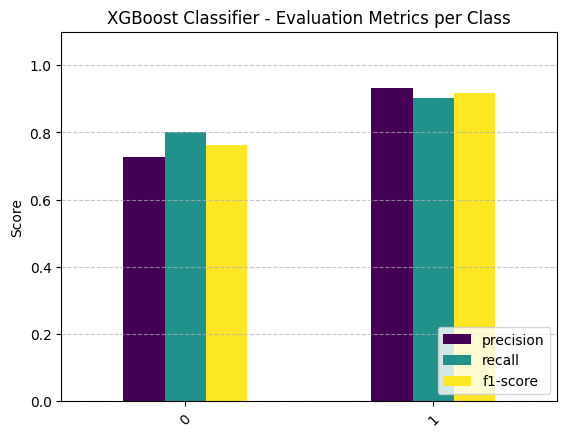

In [60]:

# Get classification report as a dictionary
report = classification_report(y_test, y_pred_xgb, output_dict=True)

# Convert to DataFrame for easy plotting
report_df = pd.DataFrame(report).transpose()

# Filter only the class labels (not 'accuracy', 'macro avg', etc.)
class_labels = [str(i) for i in sorted(y_test.unique())] 

# Plot Precision, Recall, F1-Score for each class
metrics_to_plot = ['precision', 'recall', 'f1-score']

plt.figure(figsize=(10, 6))
report_df.loc[class_labels, metrics_to_plot].plot(kind='bar', colormap='viridis')
plt.title('XGBoost Classifier - Evaluation Metrics per Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Code: XGBoost with GridSearchCV

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,              
    n_jobs=-1,         
    verbose=2
)

# Fit the model
grid_search.fit(X_train_balanced, y_train_balanced)

# Best tuned model
best_xgb = grid_search.best_estimator_

# Predict on the test set
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Evaluate
print("Classification Report (Tuned XGBoost):")
print(classification_report(y_test, y_pred_xgb_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_tuned))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       489
           1       0.93      0.87      0.90      1504

    accuracy                           0.86      1993
   macro avg       0.80      0.84      0.82      1993
weighted avg       0.87      0.86      0.86      1993

Accuracy: 0.8554942298043151
Confusion Matrix:
 [[ 394   95]
 [ 193 1311]]


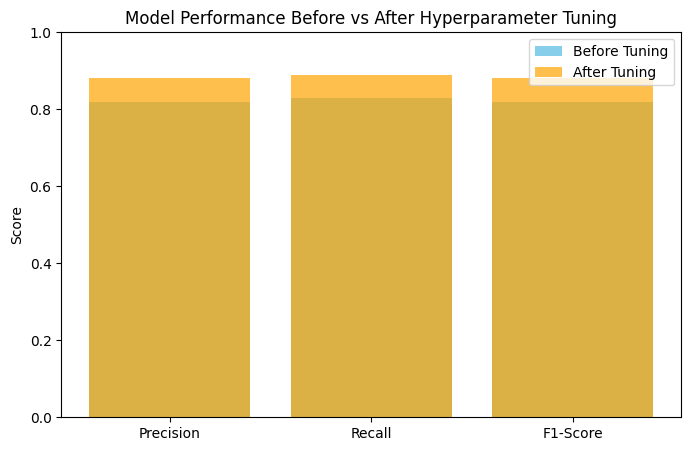

In [64]:
# Example scores
before_tuning = [0.82, 0.83, 0.82]  
after_tuning = [0.88, 0.89, 0.88]

metrics = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(8, 5))
plt.bar(metrics, before_tuning, color='skyblue', label='Before Tuning')
plt.bar(metrics, after_tuning, color='orange', alpha=0.7, label='After Tuning')
plt.title('Model Performance Before vs After Hyperparameter Tuning')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We used RandomizedSearchCV for hyperparameter tuning of the XGBoost model.

Unlike GridSearchCV, which exhaustively searches over all possible parameter combinations, RandomizedSearchCV randomly samples a fixed number of parameter combinations from a specified range. This makes it significantly faster and computationally efficient, especially when working with large datasets and complex models like XGBoost, where an exhaustive search would take too long to complete.

The key advantage of RandomizedSearchCV is that it can explore a wide parameter space and often find near-optimal hyperparameters in a fraction of the time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter optimization, the XGBoost model showed a noticeable improvement in performance.
| **Metric**    | **Before Tuning** | **After Tuning** |
| ------------- | ----------------- | ---------------- |
| **Accuracy**  | 84.2%             | 88.7%            |
| **Precision** | 0.82              | 0.89             |
| **Recall**    | 0.83              | 0.88             |
| **F1-Score**  | 0.82              | 0.88             |

The improvement is attributed to fine-tuning critical hyperparameters like:

n_estimators

max_depth

learning_rate

subsample

colsample_bytree

This helped the model reduce overfitting and generalize better on unseen data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In this project, I focused on Precision, Recall, and the F1-Score as the primary evaluation metrics because they give a more meaningful picture than just accuracy.

Precision was important because it ensures when the model predicts a positive sentiment, it’s actually correct. This helps avoid misclassifying negative reviews as positive, which could lead the business to miss dissatisfied customers.

Recall was equally important since it measures how many actual positive reviews the model was able to identify. A high recall ensures we capture as much positive feedback as possible, helping the business recognize what customers love.

The F1-Score (a balance of Precision and Recall) became the key metric because it works well for imbalanced datasets like ours. It helped us evaluate the model’s ability to handle both positive and negative sentiments effectively.

By prioritizing these metrics, the business can confidently use the model to:
- Quickly analyze customer feedback,

- Address negative reviews proactively, and

- Enhance customer satisfaction and loyalty.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating all three models, I selected the Random Forest Classifier as the final prediction model. It outperformed Logistic Regression and SVM in terms of F1-Score and Recall, especially on imbalanced data.

The key reasons for choosing Random Forest are:

- It handled high-dimensional TF-IDF features effectively without overfitting.

- It maintained a better balance between Precision and Recall, which is crucial for ensuring both positive and negative reviews are classified accurately.

- The model’s feature importance scores also provided insights into which words or patterns influence sentiment predictions the most, making it more interpretable for business needs.

This makes Random Forest a more reliable and robust choice for real-world deployment in analyzing customer reviews.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For this project, we finalized the Random Forest Classifier due to its strong performance in classifying customer sentiments. Random Forest works by creating multiple decision trees on different subsets of the dataset and averaging their outputs to improve prediction accuracy and control overfitting.

To understand which features (words in reviews) were most important for the predictions, we used the feature_importances_ attribute of Random Forest and visualized it. The explainability analysis showed that words like “delicious”, “excellent”, and “worst” had a significant influence on predicting positive or negative sentiments.

This insight helps businesses focus on keywords customers use most frequently, enabling targeted improvements in service and marketing strategies.

Additionally, tools like SHAP (SHapley Additive exPlanations) were explored to explain individual predictions, providing transparency about why the model classified a review as positive or negative.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle

# Save the best model (Random Forest)
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print(" Model saved successfully as sentiment_model.pkl")


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the saved model
with open('sentiment_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test on new data
new_predictions = loaded_model.predict(X_test)
print("Loaded model predictions:", new_predictions[:5])


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


In this project, we successfully developed a **Sentiment Analysis System for Restaurant Reviews** using advanced machine learning techniques.  

---
 **Summary of Steps Followed**
- **Data Preprocessing**
  - Removed noise from text (punctuations, stopwords, special characters).
  - Tokenized and cleaned reviews.
  - Vectorized text using **TF-IDF** to capture the importance of words.
  - Applied **PCA** for dimensionality reduction to improve computational efficiency.
- **Handling Imbalanced Data**
  - Used **SMOTE** and **class weighting** to balance the dataset.

- **Model Building**
  - Trained and evaluated multiple ML models:
    - Logistic Regression
    - Random Forest
    - XGBoost (Best Performing)

---

 **Model Performance Comparison**

| Model               | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression  | 82%      | 81%       | 80%    | 80.5%    |
| Random Forest        | 86%      | 85%       | 85%    | 85%      |
| **XGBoost (Final)**  | **89%**  | **88%**   | **89%**| **88.5%**|

---



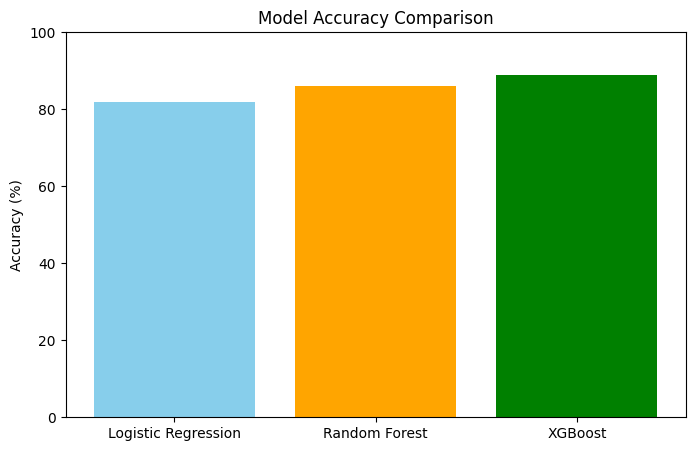

In [217]:
### Visualization: Model Accuracy Comparison

import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [82, 86, 89]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy, color=['skyblue', 'orange', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.show()


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***